# Directory of Consumption-Saving Models

HARK has *many* consumption-saving models in several files in `HARK.ConsumptionSaving`. This notebook provides a directory of all of them, ordered (roughly) from the most basic to the most niche. We provide only brief textual descriptions of the models here. The full mathematical representation for each model can be found in its respective file and/or at the linked reference notebooks (links on `AgentType` names).

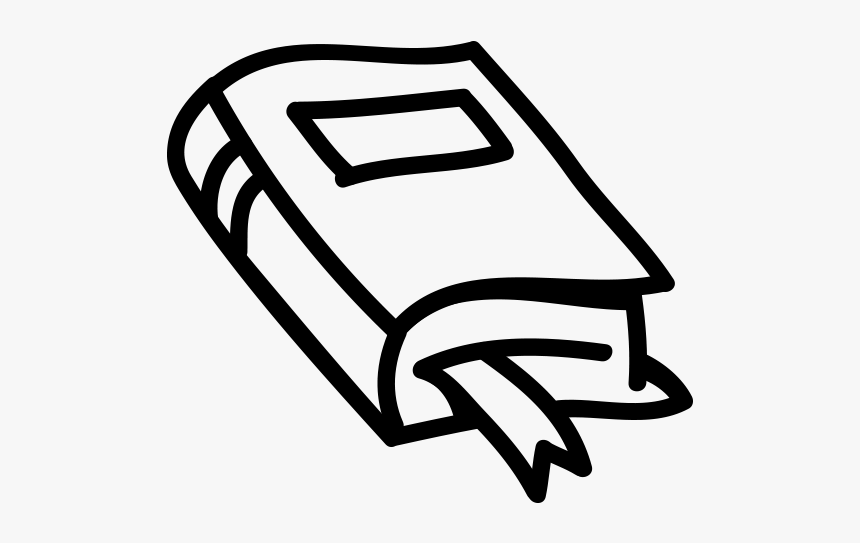

In [1]:
from IPython import display

display.Image("../../docs/images/directory_thumbnail.png", width=200)

## `ConsIndShockModel`: Models With(out) Idiosyncratic Income Risk and One Risk-Free Asset

The model(s) that started it all! `ConsIndShockModel` has "canonical" consumption-saving models with the most fundamental / core assumptions. Most HARK models descend from the models here, in one way or another.

Critically, these models are *permanent income normalized*: their state space and consumption function are expressed in terms of dollar values divided by permanent income. Actual *levels* can be recovered by multiplying by permanent income. Mathematically speaking, these models are homothetic with respect to permanent income.

### `PerfForesightConsumerType`: Consumption-saving with no financial risk at all

[`PerfForesightConsumerType`](../ConsIndShockModel/PerfForesightConsumerType.ipynb) class represents consumers who can save in a single risk-free asset and who face mortality risk, but who face no income risk. Like all HARK models, these consumers have CRRA preferences over consumption and discount utility geometrically.

The default parameters do not include a borrowing constraint, but the model *can* handle this feature and solve for the consumption function exactly (up to machine precision).

### `IndShockConsumerType`: Consumption-saving with permanent-transitory income risk

[`IndShockConsumerType`](../ConsIndShockModel/IndShockConsumerType.ipynb) is HARK's core "workhorse" model, and the one for which the most theory work has been done. Agents in this model face iid income shocks each period, with two components: a fully *permanent* shock that affects their income in this period and all future periods, and a fully *transitory* component that only affects income this period.

Chris Carroll has spent a lot of time pinning down the theoretical properties of this model, and HARK's solver incorporates a lot of that mathematical material. Particularly, the consumption function will always obey theoretical constraints with respect to the perfect foresight solution, as well as boundary behavior as market resources go to their minimum level.

### `KinkedRconsumerType`: Consumption-saving with a higher interest rate for borrowing

[`KinkedRconsumerType`](../ConsIndShockModel/KinkedRconsumerType.ipynb) agents face the exact same problem as those in `IndShockConsumerType` *except* that there is a higher interest rate for *borrow* than for *saving*. This creates two kinks in the consumption function, with a $c=m$ segment in between.

Notably, the first order condition does not hold with equality on the $c=m$ segment. Instead, the marginal value of assets is too low to *save* any money, but it is also too high to *borrow* money.

## `GenIncProcessModel`: Non-Permanent-Income-Normalized Models

In this module, we lift the assumption of a permanent-transitory income shock structure and allow for a *generalized* income process. The key difference is that the permanent (or persistent) component of income now appears explicitly as a state variable in the policy function (and other components of the solution).

### `GenIncProcessConsumerType`: Generalized income processes

[`GenIncProcessConsumerType`](../ConsGenIncProcessModel/GenIncProcessConsumerType.ipynb) is the base `AgentType` subclass for this module; the other subclasses only extend it by setting different default constructors.

The permanent-income-normalizable income process is characterized by a sequence of expected permanent income growth factors and joint distributions of permanent and transitory income shocks. In contrast, the "general" income process is characterized by a sequence of "expected future income functions". These map from current `pLvl` values to succeeding period `pLvl' values, as a general function.

In this model, `pLvl` isn't "permanent" income *per se*, but instead a univariate measure of some semi-permanent or persistent component. The key restriction is that the *continuation-relevant* information has only one dimension after income shocks have been realized.

For ease of compatibility, the two components of the income shock distribution are still labeled `TransShk` and `PermShk`, but the latter affects `pLvl` multiplicatively, no matter the interpretation of `pLvl` for your setting. The transitory shock is, of course, still fully transitory.

### `IndShockExplicitPermIncConsumerType`: Workhorse model with explicit permanent income

[`IndShockExplicitPermIncConsumerType`](../ConsGenIncProcessModel/GenIncProcessConsumerType.ipynb) is meant to reproduce the same model as `IndShockConsumerType`, but maintains permanent income as an explicit state variable. This class mainly exists as a benchmark comparison.

Note that the solution for this class will be *less accurate* than the analogous one for `IndShockConsumerType` because the grid of permanent income values is necessarily bounded, but actual permanent income can grow (or shrink!) without bound. Thus there is extrapolation error near the top and bottom of the permanent income grid, which propagates throughout the solution.

### `PersistentShockConsumerType`: Consumption-saving model with AR(1) income process

[`PersistentShockConsumerType`](../ConsGenIncProcessModel/GenIncProcessConsumerType.ipynb) is simply `GenIncProcessConsumerType` with an AR(1) process (in logs) used for the persistent component of income. This model is good for working with highly persistent (but not permanent) income shocks. Because the model is not normalized, it can also be adapted to incorporate a realistic income tax structure and/or Social Security system.

We think that reasonable values of the (annual) correlation or persistence coefficient are between 0.97 and 0.995, but we won't judge any values that you use.

## `ConsMarkovModel`: Models with a discrete state that evolves exogenously

This module has only one `AgentType` subclass, [`MarkovConsumerType`](../ConsMarkovModel/MarkovConsumerType.ipynb), but it is arguably one of the most flexible models in HARK. It extends `IndShockConsumerType` by incorporating a discrete state that changes each period based on some Markov matrix.

Most elements of the consumer's problem can vary by discrete state, including the interest factor, expected permanent income growth, survival probability, and the distribution of income shocks.

Depending on how you specify or parameterize the model, `MarkovConsumerType` can represent many different kinds of models.  It can be used to represent a model with persistent unemployment, or one whose income shock distribution has a more complicated structure than permanent-transitory. It can be used to solve models with persistent variation in returns to saving, or as a "cheap" measure of health with variable survival probabilities. There are many more strange and unusual specifications, as well.

## `TractableBufferStockModel`: Illustrative model for learning consumption theory

Famously, consumption-saving models with income risk (and risk-averse agents) have no closed form solution form for their optimal consumption function prior to the terminal period. Some theoretical results to characterize the consumption function and how it changes with model parameters are fairly easy to derive and can be demonstrated for students, but others are significantly trickier.

Chris Carroll developed the "tractable buffer stock" model as a teaching tool for learning the theory of consumption-saving models. It has a very specific (and extreme) form of income uncertainty: the consumer faces a constant risk each period of becoming *permanently* unemployed and *never* receiving labor income again. Otherwise, their labor income grows by a constant factor.

The model for `TractableConsumerType`s doesn't *quite* have a closed form solution, but *more* of its characteristics and comparative statics can be derived on paper. Moreover, the solution method for *efficiently* constructing the consumption function is quite different to other HARK models. Broadly, the model is (more or less) only for teaching purposes, not for "serious" applied work.

## `ConsRepAgentModel`: What's this doing here?

HARK is nominally for heterogeneous agents macroeconomics, but that can't stop us from including a couple representative agent models anyway.

### `RepAgentConsumerType`: Basic representative agent model

[`RepAgentConsumerType`](../ConsRepAgentModel/RepAgentConsumerType.ipynb) is a bog standard macroeconomic model in which a representative agent allocates their resources between consumption retained assets, which are used as capital in the subsequent period. Labor supply is assumed to be exogenous, and the "income" shocks are re-interpreted as labor productivity shocks.

The production technology is assumed to be Cobb-Douglas, and factor prices (wage rate and interest rate) are determined competitively as the marginal product of each factor.

### `RepAgentMarkovConsumerType`: Representative agent model with a discrete state

[`RepAgentMarkovConsumerType`](../ConsRepAgentModel/RepAgentConsumerType.ipynb) extends the prior one by adding a discrete state with exogenous dynamics given by some Markov matrix. There are fewer model objects that vary with the discrete state as compared to `MarkovConsumerType`, as there is no death in the model and the interest rate is endogenous.

The distribution of labor productivity shocks and the expected growth rate of labor productivity are the only things that can vary by the discrete state. The model can easily be extended to allow the capital depreciation factor and capital's share of production to also vary.

## `ConsAggShockModel`

This is the main module for *proper* heterogeneous agents macroeconomic models in HARK, and a good follow-up to the `RepAgentModel`. These models involve both idiosyncratic *and* aggregate productivity shocks, thus the name of the module.

### `AggShockConsumerType`: Standard model with aggregate and idiosyncratic income shocks

[`AggShockConsumerType`](../ConsAggShockModel/AggShockConsumerType.ipynb) extends the `IndShockConsumerType` by adding a second state variable, *aggregate* market resources. Moreover, it adds *two* more shock variables: permanent and transitory *aggregate* shocks.

The economy produces output as a Cobb-Douglas aggregation of (inelastically supplied) labor and capital. Factor prices (the interest rate and wage rate) are determined endogenously in the model using the competitive outcome (marginal product of each factor).

When they make their consumption-saving decision, agents observe their own (normalized) market resources *and* (normalized) *aggregate* market resources. They have some expectation about how much will be saved in aggregate, and thus how much capital the economy will have at the start of the next period.

The microeconomic model for an `AggShockConsumerType` can be solved for arbitrary expectations about how aggregate market resources map to aggregate assets. To solve the model with *rational expectations*, one or more `AggShockConsumerType` instances must be combined with a `CobbDouglasEconomy`, a subclass of `Market`. The *economy itself* must have its `solve()` method run in order to iteratively find the aggregate saving rule that is consistent with rational expectations.

Alternatively, an `AggShockConsumerType` can be solved with a *trivial* grid of aggregate market resources if it is combined with a `SmallOpenEconomy`. In this macroeconomic framework, factor prices are determined *exogenously* (e.g. based on international conditions), but aggregate shocks still occur.

### `AggShockMarkovConsumerType`: Aggregate shocks with a discrete state

Let's do an SAT analogy: `IndShockConsumerType` : `MarkovConsumerType` :: `AggShockConsumerType` : [`AggShockMarkovConsumerType`](../ConsAggShockModel/AggShockConsumerType.ipynb).

This model is useful for handling persistent aggregate conditions: maybe higher or lower aggregate growth rates, or different unemployment rates, etc.

## `ConsRiskyAssetModel`: Consumption-saving with one risky and one risk-free asset

HARK has several modules with consumption-saving models that include risky asset returns, rather than a single risk-free asset. This one is the most basic among them.

The [`ConsRiskyAssetModel`](../ConsPortfolioModel/RiskyAssetConsumerType.ipynb) actually represents *two* models. In both cases, the consumer can save their assets in a risky asset (with known distribution of returns). A Boolean parameter determines whether the agents can *choose* their portfolio allocation between risky and risk-free assets. When this parameter is `False`, the *proportional share* of wealth in each asset is fixed at the value in the parameter `RiskyShareFixed`.

## `ConsPortfolioModel`: Consumption-saving with portfolio allocation and extra features

The [`PortfolioConsumerType`](../ConsPortfolioModel/PortfolioConsumerType.ipynb) is an "advanced" version of `RiskyAssetConsumerType`. If you do not need to use any of its extra features, we recommend against using it; you should use `RiskyAssetConsumerType` instead. The solver is significantly slower *because* of the extra options.

There are two key additional features, which can be combined:

1. An option to limit the agents to portfolio choice on a *discrete* grid of shares.
2. Restricting agents to only adjust their portfolio share with *probability less than one*.

Because of (2), the current allocation of assets is a state variable in the agent's problem.

## `ConsBequestModel`: Models with a warm glow bequest motive

The two models here extend other HARK `AgentType` subclasses to include a *warm glow bequest motive*. Arguably, these should be "folded into" the parent model, replacing them with a (slightly) more general model.

### `BequestWarmGlowConsumerType`: Idiosyncratic income shocks with a warm glow bequest motive

[`BequestWarmGlowConsumerType`](../ConsBequestModel/example_WarmGlowBequest.ipynb) extends the core `IndShockConsumerType` by incorporating a bequest motive. Specifically, agents anticipate that at the moment of their death, they will experience one last flow of utility based on their assets, using their ordinary utility-of-consumption function.

The bequest motive is parameterized by a scaling factor and an additive shifter (inside the utility function). These parameters can be algebraically rearranged to show that it is mathematically equivalent to having a linear "consumption function at death".

### `BequestWarmGlowPortfolioType`: Income shocks and portfolio choice with a warm glow bequest motive

[`BequestWarmGlowPortfolioType`](../ConsBequestModel/example_WarmGlowBequestPort.ipynb) extends `PortfolioConsumerType` to include a warm glow bequest. Note that the solver includes the "bells and whistles" of `PortfolioConsumerType`, not just the "basic" options in `PortChoiceConsumerType`.

## `ConsWealthPortfolioModel`: Agents who value wealth in and of itself

The standard assumption in consumption-saving models is that agents derive utility from *actually consuming* some of their resources. Retained assets are only valuable to the extent that they *will* be consumed at some point.

The [`WealthPortfolioConsumerType`](../ConsBequestModel/example_WealthPortfolio.ipynb) represents agents whose wealth *directly* enters their flow utility function. Specifically, the model assumes that "effective consumption" is a Cobb-Douglas aggregation of actual consumption and retained assets. This provides an additional incentive to hold wealth, as it will yield additional utility today *and* in future periods.

As the name of the class implies, this model adjusts or extends our portfolio-choice models-- the agents can allocate their wealth between a risky and a risk-free asset.

## `ConsLaborModel`: Models with endogenous labor supply

Most models in HARK assume that the agents supply their labor inelastically: they work (when employed) up until some retirement age, and then cease working. The `ConsLaborModel` module has `AgentType` subclasses for consumers who optimally choose their labor supply.

Currently, the only model is [`LaborIntMargConsumerType`](../ConsLaborModel/LaborIntMargConsumerType.ipynb). These agents make a consumption-saving decision *and* choose how to allocate their time between labor and leisure. Utility flow is based on an aggregation of consumption and leisure. Labor supply choice is on the *intensive margin*, as the agents can choose any fraction of their time to work.

Years ago, we began development on a `LaborExtMargConsumerType` who makes a *binary* decision about whether or not to work. This work was not completed, but we hope to resurrect it in the future.

## `ConsHealthModel`: Consumption-saving models with endogenous health

Matt White does a lot of work with consumption-saving models that include health and/or medical spending, but the public version of HARK currently only includes one model with endogenous health, the [`BasicHealthConsumerType`](../ConsHealthModel/BasicHealthConsumerType.ipynb).

Agents in this model can allocate their market resources among consumpton, saving, and health investment. Buying health investment yields concave returns to health capital, which affects both survival probability *and* labor productivity.

Unlike most other HARK models, this model is *not* permanent-income-normalized, and in fact has *no* permanent income shocks at all. All income shocks are fully transitory, which is a major reason that we have labeled it as "basic". It is here as a demonstration or example of how health investment works in a consumption-saving framework, and as an example implementation of the `Curvilinear2DInterp` class.

In the future, Matt will move more advanced health models from his private repositories into public HARK. Eventually.

## `ConsMedModel`: Models with medical expenses as an additional choice

Whereas `ConsHealthModel` concerns models with an *endogenous* health state, `ConsMedModel` is for models that care about *medical expenses* as an additional source of risk for consumers. There are currently two models.

### `MedShockConsumerType`: Consumption-saving with medical care as a second consumption good

[`MedShockConsumerType`](../ConsMedModel/MedShockConsumerType.ipynb) extends `GenIncProcessModel` to include medical care as a second consumption good. The utility of medical care is additive with utility of consumption, and is also CRRA. However, the risk aversion coefficient for medical care should be *greater* than that for consumption (and be greater than one).

Moreover, (marginal) utility of medical care is *stochastic*, with a medical needs shock drawn at the start of each period. When medical needs are zero, the agent does not want to buy any care at all. When medical needs are positive, they want to mititgate the utility loss by purchasing care.

The functional form in the current version of the model is taken directly from the "endogenous medical expenses" extension in DeNardi, French, and Jones (2010). However, we have since realized that it *should* be algebraically rearranged slightly, moving the medical needs shock from being multiplicative *outside* the CRRA term to being an inverse factor on medical care *inside* the utility function.

In the near future, this model will be adjusted to incorporate that change, which has mathematically convenient properties.

### `MedExtMargConsumerType`: Medical care choice on the extensive margin

`MedShockConsumerType` agents purchase non-zero medical care *if and only if* their medical needs shock is strictly positive. They make a choice of the *intensity* of medical care, but whether or not they receive *any* is strictly determined by the probability that the medical needs shock is zero vs positive. Thus there cannot be any *extensive margin* choice, ruling out extensive margin moral hazard-- or even richer people being more likely to get medical care at all.

[`MedExtMargConsumerType`](../ConsMedModel/MedExtMargConsumerType.ipynb) is an initial attempt to model medical care on the extensive margin. Each period, along with their income shocks, agents also observe a medical shock with *two* components: medical needs and medical cost. They face a binary choice of whether to suffer the medical needs as a utility loss *or* pay the cost for treatment.

As is, the model is quite basic and does not have serially correlated shocks, nor any representation of insurance. Moreover, the assumption of bivariate lognormal medical shocks is *hardcoded* into the solution method. These assumptions will be generalized in the future.

## `ConsPrefShockModel`: Consumption-saving with stochastic marginal utility

As a precursor to the medical expense shock model, HARK has long had models with *one* consumption good and random shocks to marginal utility.

### `PrefShockConsumerType`: Standard model with marginal utility shocks

[`PrefShockConsumerType`](../ConsPrefShockModel/PrefShockConsumerType.ipynb) agents are identical to those in `IndShockConsumerType`, but they *also* draw a "preference shock" each period. These shocks are multiplicative on utility, representing how valuable consumption is *this period* compared to normal (shocks should be mean 1).

This model is probably most useful for handling consumption dynamics with higher frequency than usual. That is, if you were to observe someone's consumption spending on a monthly basis, it would be (relatively) more volatile than their spending on an *annual* basis-- sometimes "things just come up" and someone needs to buy more in one month than another. The model can thus generate volatile consumption without even more volatile income.

### `KinkyPrefConsumerType`: Preference shocks and different interest rates for borrowing vs saving

Let's do another SAT analogy: `IndShockConsumerType` : `PrefShockConsumerType` :: `KinkedRconsumerType` : [`KinkyPrefConsumerType`](../ConsPrefShockModel/PrefShockConsumerType.ipynb).

As fun trivia, this model is what gave Econ-ARK its logo-- the "lightning rainbow" is a stylized image of the consumption function for a [`KinkyPrefConsumerType`](../ConsPrefShockModel/PrefShockConsumerType.ipynb). We chose this because the original solver for this model was a demonstration of multiple inheritance in our *solver classes*. That is, the solver code consisted entirely of specifying a class that inherited from both `PrefShock` and `KinkedR`.

We have since abandoned this complicated approach to model solvers, but the logo is still pretty nifty!